In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [159]:
raw_train = pd.read_csv('train.csv')
raw_test_submit = pd.read_csv('test.csv')

In [160]:
raw_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [161]:
raw_test_submit.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,...,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,...,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,...,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,...,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,...,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


## Extracting Features

In [162]:
raw_train.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [163]:
raw_train.isnull().sum() # No missing values

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [164]:
raw_train.head(3)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0


In [165]:
raw_train['Employment Duration'].value_counts()

MORTGAGE    36351
RENT        24150
OWN          6962
Name: Employment Duration, dtype: int64

In [166]:
raw_train['Grade'].value_counts()

C    19085
B    18742
A    12055
D     8259
E     6446
F     2246
G      630
Name: Grade, dtype: int64

In [167]:
raw_train['Sub Grade'].value_counts()

B4    4462
C1    4188
B3    3999
A5    3540
B2    3520
B5    3408
D1    3304
C4    3250
C2    3219
C3    3121
B1    2924
C5    2472
A4    2264
D4    2050
D2    1963
D5    1952
A2    1837
D3    1824
E2    1746
A3    1685
A1    1364
E3    1321
E1    1298
E4    1117
F2     947
F1     824
E5     769
F5     582
F3     578
G2     447
F4     441
G1     366
G5     284
G3     246
G4     151
Name: Sub Grade, dtype: int64

In [168]:
mean_labels = raw_train.groupby(['Grade'])['Loan Status'].mean().sort_values().index
mean_labels2 = {k:i for i,k in enumerate(mean_labels)}
mean_labels2

{'B': 0, 'A': 1, 'C': 2, 'E': 3, 'D': 4, 'F': 5, 'G': 6}

In [169]:
raw_train['Grade_mean_encoded'] = raw_train['Grade'].map(mean_labels2)
raw_train.drop(['Grade'], axis='columns', inplace=True)
raw_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Employment Duration,Home Ownership,...,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,C4,MORTGAGE,176346.62670,...,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,D3,RENT,39833.92100,...,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0,2
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,D4,MORTGAGE,91506.69105,...,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0,5
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C3,MORTGAGE,108286.57590,...,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0,2
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,D4,MORTGAGE,44234.82545,...,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0,2


In [170]:
mean_labels = raw_train.groupby(['Employment Duration'])['Loan Status'].mean().sort_values().index
mean_labels2 = {k:i for i,k in enumerate(mean_labels)}
mean_labels2

{'MORTGAGE': 0, 'RENT': 1, 'OWN': 2}

In [171]:
raw_train['Employment_mean_encoded'] = raw_train['Employment Duration'].map(mean_labels2)
raw_train.drop(['Employment Duration'], axis='columns', inplace=True)
raw_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Verification Status,...,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded,Employment_mean_encoded
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,C4,176346.62670,Not Verified,...,0,INDIVIDUAL,49,0,31,311301,6619,0,0,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,D3,39833.92100,Source Verified,...,0,INDIVIDUAL,109,0,53,182610,20885,0,2,1
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,D4,91506.69105,Source Verified,...,0,INDIVIDUAL,66,0,34,89801,26155,0,5,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C3,108286.57590,Source Verified,...,0,INDIVIDUAL,39,0,40,9189,60214,0,2,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,D4,44234.82545,Source Verified,...,0,INDIVIDUAL,18,0,430,126029,22579,0,2,0


In [172]:
mean_labels = raw_train.groupby(['Application Type'])['Loan Status'].mean().sort_values().index
mean_labels2 = {k:i for i,k in enumerate(mean_labels)}
mean_labels2

{'JOINT': 0, 'INDIVIDUAL': 1}

In [173]:
raw_train['Application_mean_encoded'] = raw_train['Application Type'].map(mean_labels2)
raw_train.drop(['Application Type'], axis='columns', inplace=True)
raw_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Verification Status,...,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded,Employment_mean_encoded,Application_mean_encoded
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,C4,176346.62670,Not Verified,...,0,49,0,31,311301,6619,0,0,0,1
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,D3,39833.92100,Source Verified,...,0,109,0,53,182610,20885,0,2,1,1
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,D4,91506.69105,Source Verified,...,0,66,0,34,89801,26155,0,5,0,1
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C3,108286.57590,Source Verified,...,0,39,0,40,9189,60214,0,2,0,1
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,D4,44234.82545,Source Verified,...,0,18,0,430,126029,22579,0,2,0,1


In [174]:
mean_labels = raw_train.groupby(['Verification Status'])['Loan Status'].mean().sort_values().index
mean_labels2 = {k:i for i,k in enumerate(mean_labels)}
mean_labels2

{'Verified': 0, 'Not Verified': 1, 'Source Verified': 2}

In [175]:
raw_train['Verification_mean_encoded'] = raw_train['Verification Status'].map(mean_labels2)
raw_train.drop(['Verification Status'], axis='columns', inplace=True)
raw_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Payment Plan,...,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded,Employment_mean_encoded,Application_mean_encoded,Verification_mean_encoded
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,C4,176346.62670,n,...,49,0,31,311301,6619,0,0,0,1,1
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,D3,39833.92100,n,...,109,0,53,182610,20885,0,2,1,1,2
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,D4,91506.69105,n,...,66,0,34,89801,26155,0,5,0,1,2
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C3,108286.57590,n,...,39,0,40,9189,60214,0,2,0,1,2
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,D4,44234.82545,n,...,18,0,430,126029,22579,0,2,0,1,2


In [176]:
mean_labels = raw_train.groupby(['Payment Plan'])['Loan Status'].mean().sort_values().index
mean_labels2 = {k:i for i,k in enumerate(mean_labels)}
mean_labels2

{'n': 0}

In [177]:
raw_train['Payment_mean_encoded'] = raw_train['Payment Plan'].map(mean_labels2)
raw_train.drop(['Payment Plan'], axis='columns', inplace=True)
raw_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Loan Title,...,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded,Employment_mean_encoded,Application_mean_encoded,Verification_mean_encoded,Payment_mean_encoded
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,C4,176346.62670,Debt Consolidation,...,0,31,311301,6619,0,0,0,1,1,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,D3,39833.92100,Debt consolidation,...,0,53,182610,20885,0,2,1,1,2,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,D4,91506.69105,Debt Consolidation,...,0,34,89801,26155,0,5,0,1,2,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C3,108286.57590,Debt consolidation,...,0,40,9189,60214,0,2,0,1,2,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,D4,44234.82545,Credit card refinancing,...,0,430,126029,22579,0,2,0,1,2,0


### For test

In [178]:
mean_labels = raw_test_submit.groupby(['Grade'])['Loan Status'].mean().sort_values().index
mean_labels2 = {k:i for i,k in enumerate(mean_labels)}
mean_labels2

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

In [179]:
raw_test_submit['Grade_mean_encoded'] = raw_test_submit['Grade'].map(mean_labels2)
raw_test_submit.drop(['Grade'], axis='columns', inplace=True)
raw_test_submit.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Employment Duration,Home Ownership,...,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,D1,RENT,76468.82190,...,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN,0
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,E3,MORTGAGE,38079.01344,...,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN,1
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,C3,MORTGAGE,51275.93268,...,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN,0
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A2,RENT,68867.98965,...,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN,0
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,B3,OWN,91556.85423,...,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN,2


In [180]:
mean_labels = raw_test_submit.groupby(['Employment Duration'])['Loan Status'].mean().sort_values().index
mean_labels2 = {k:i for i,k in enumerate(mean_labels)}
mean_labels2

{'MORTGAGE': 0, 'OWN': 1, 'RENT': 2}

In [181]:
raw_test_submit['Employment_mean_encoded'] = raw_test_submit['Employment Duration'].map(mean_labels2)
raw_test_submit.drop(['Employment Duration'], axis='columns', inplace=True)
raw_test_submit.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Verification Status,...,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded,Employment_mean_encoded
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,D1,76468.82190,Source Verified,...,0,INDIVIDUAL,135,0,24,475442,4364,NaN,0,2
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,E3,38079.01344,Source Verified,...,0,INDIVIDUAL,56,0,1,72412,2573,NaN,1,0
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,C3,51275.93268,Source Verified,...,0,INDIVIDUAL,3,0,26,284825,19676,NaN,0,0
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A2,68867.98965,Verified,...,0,INDIVIDUAL,21,0,32,40842,7226,NaN,0,2
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,B3,91556.85423,Verified,...,0,INDIVIDUAL,104,0,33,90825,26145,NaN,2,1


In [182]:
mean_labels = raw_test_submit.groupby(['Application Type'])['Loan Status'].mean().sort_values().index
mean_labels2 = {k:i for i,k in enumerate(mean_labels)}
mean_labels2

{'INDIVIDUAL': 0, 'JOINT': 1}

In [183]:
raw_test_submit['Application_mean_encoded'] = raw_test_submit['Application Type'].map(mean_labels2)
raw_test_submit.drop(['Application Type'], axis='columns', inplace=True)
raw_test_submit.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Verification Status,...,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded,Employment_mean_encoded,Application_mean_encoded
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,D1,76468.82190,Source Verified,...,0,135,0,24,475442,4364,NaN,0,2,0
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,E3,38079.01344,Source Verified,...,0,56,0,1,72412,2573,NaN,1,0,0
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,C3,51275.93268,Source Verified,...,0,3,0,26,284825,19676,NaN,0,0,0
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A2,68867.98965,Verified,...,0,21,0,32,40842,7226,NaN,0,2,0
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,B3,91556.85423,Verified,...,0,104,0,33,90825,26145,NaN,2,1,0


In [184]:
mean_labels = raw_test_submit.groupby(['Verification Status'])['Loan Status'].mean().sort_values().index
mean_labels2 = {k:i for i,k in enumerate(mean_labels)}
mean_labels2

{'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}

In [185]:
raw_test_submit['Verification_mean_encoded'] = raw_test_submit['Verification Status'].map(mean_labels2)
raw_test_submit.drop(['Verification Status'], axis='columns', inplace=True)
raw_test_submit.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Payment Plan,...,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded,Employment_mean_encoded,Application_mean_encoded,Verification_mean_encoded
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,D1,76468.82190,n,...,135,0,24,475442,4364,NaN,0,2,0,1
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,E3,38079.01344,n,...,56,0,1,72412,2573,NaN,1,0,0,1
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,C3,51275.93268,n,...,3,0,26,284825,19676,NaN,0,0,0,1
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A2,68867.98965,n,...,21,0,32,40842,7226,NaN,0,2,0,2
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,B3,91556.85423,n,...,104,0,33,90825,26145,NaN,2,1,0,2


In [186]:
mean_labels = raw_test_submit.groupby(['Payment Plan'])['Loan Status'].mean().sort_values().index
mean_labels2 = {k:i for i,k in enumerate(mean_labels)}
mean_labels2

{'n': 0}

In [187]:
raw_test_submit['Payment_mean_encoded'] = raw_test_submit['Payment Plan'].map(mean_labels2)
raw_test_submit.drop(['Payment Plan'], axis='columns', inplace=True)
raw_test_submit.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Loan Title,...,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded,Employment_mean_encoded,Application_mean_encoded,Verification_mean_encoded,Payment_mean_encoded
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,D1,76468.82190,Home improvement,...,0,24,475442,4364,NaN,0,2,0,1,0
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,E3,38079.01344,Credit card refinancing,...,0,1,72412,2573,NaN,1,0,0,1,0
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,C3,51275.93268,Debt consolidation,...,0,26,284825,19676,NaN,0,0,0,1,0
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A2,68867.98965,Debt Consolidation,...,0,32,40842,7226,NaN,0,2,0,2,0
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,B3,91556.85423,Debt consolidation,...,0,33,90825,26145,NaN,2,1,0,2,0


In [188]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
raw_train['Batch Enrolled'] =  label_encoder.fit_transform(raw_train['Batch Enrolled'])
# raw_train['Batch Enrolled'].max()

In [189]:
raw_train['Sub Grade'] = label_encoder.fit_transform(raw_train['Sub Grade'])

In [190]:
raw_train['Loan Title'] = label_encoder.fit_transform(raw_train['Loan Title'])

In [191]:
raw_train['Initial List Status']= label_encoder.fit_transform(raw_train['Initial List Status'])

In [192]:
raw_test_submit['Batch Enrolled'] =  label_encoder.fit_transform(raw_test_submit['Batch Enrolled'])

In [193]:
raw_test_submit['Sub Grade'] = label_encoder.fit_transform(raw_test_submit['Sub Grade'])

In [194]:
raw_test_submit['Loan Title'] = label_encoder.fit_transform(raw_test_submit['Loan Title'])

In [195]:
raw_test_submit['Initial List Status']= label_encoder.fit_transform(raw_test_submit['Initial List Status'])

In [196]:
X = raw_train.drop(['Loan Status'],axis='columns')
y = raw_train['Loan Status']

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [198]:
# X_train = raw_train.drop(['Loan Status'], axis='columns')

In [199]:
# y_train = raw_train['Loan Status']

In [200]:
# X_test = raw_test_submit.drop(['Loan Status'], axis='columns')

In [201]:
# raw_test_submit['Loan Status'] = 0
# # y_test = raw_test_submit['Loan Status']
# # y_test

In [202]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Loan Title,...,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Grade_mean_encoded,Employment_mean_encoded,Application_mean_encoded,Verification_mean_encoded,Payment_mean_encoded
0,-0.451791,-0.259713,1.716100,-0.366218,-1.0,-0.578947,-0.146705,0.909091,-0.065133,-0.363636,...,0.753623,0.0,0.318182,1.412295,-0.576955,-0.666667,1.0,0.0,-0.5,0.0
1,-0.127873,0.365165,-0.098521,2.338298,-1.0,-0.894737,-0.108796,1.000000,-0.292184,-0.363636,...,-0.043478,0.0,-0.954545,0.063819,0.590029,-0.666667,1.0,0.0,0.5,0.0
2,-0.382018,-0.339854,-0.412117,-0.565612,0.0,-0.631579,-0.555947,0.000000,0.092923,0.636364,...,-0.521739,0.0,76.772727,-0.170629,0.647742,0.000000,0.0,0.0,0.5,0.0
3,-0.334100,-0.122931,-0.558764,-0.592508,0.0,0.842105,-0.367027,-0.545455,0.627595,0.636364,...,-0.333333,0.0,-0.318182,-0.451944,0.024900,-0.666667,1.0,0.0,0.5,0.0
4,0.140493,-0.054911,0.209661,-1.084383,-1.0,0.947368,-0.386337,0.545455,-0.503399,-0.363636,...,1.231884,0.0,0.818182,0.393536,-0.427011,0.666667,0.0,0.0,-0.5,0.0


In [203]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_test=pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
X_test.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Loan Title,...,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Grade_mean_encoded,Employment_mean_encoded,Application_mean_encoded,Verification_mean_encoded,Payment_mean_encoded
0,1.260013,0.787197,0.951986,-0.966764,0.0,0.526316,0.079480,1.5,0.645478,0.000000,...,0.871429,0.0,15.227273,0.239136,-0.633892,-0.666667,0.0,0.0,-0.5,0.0
1,-0.336700,-0.308368,0.605575,0.216301,-1.0,0.052632,0.331992,-0.4,-0.239114,-0.363636,...,-0.728571,0.0,0.090909,1.325937,-0.352056,-0.333333,0.0,0.0,0.5,0.0
2,-0.171570,-0.527782,-0.161283,-0.239785,0.0,-0.578947,-0.900409,0.8,-0.104392,0.000000,...,0.485714,0.0,0.181818,-0.463632,1.000042,-0.333333,1.0,0.0,0.0,0.0
3,-0.391886,0.297573,1.345525,0.330706,0.0,0.105263,-1.219237,-1.0,-0.359690,-0.363636,...,-0.128571,0.0,-0.227273,-0.579568,1.065158,-0.666667,1.0,0.0,0.5,0.0
4,1.152578,-0.781925,0.780069,-0.153119,0.0,0.684211,-0.736076,-0.8,-0.132108,-0.363636,...,0.642857,0.0,0.863636,0.536799,-0.406549,-0.666667,0.0,0.0,-0.5,0.0


In [204]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

In [205]:
mask = yhat != -1

In [206]:
X_train = X_train[mask]

In [207]:
y_train = y_train[mask]

In [208]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

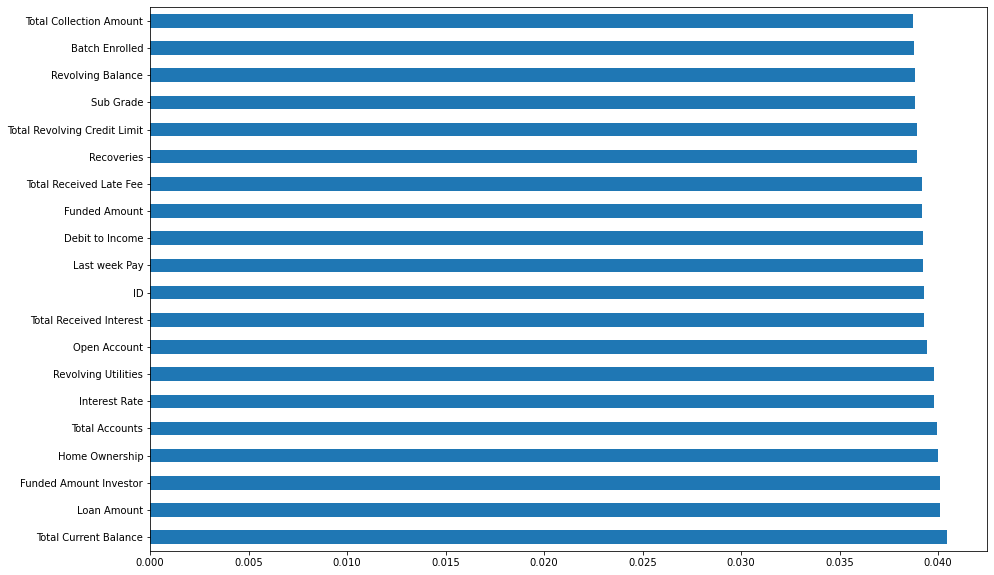

In [209]:
plt.figure(figsize = [15,10])
ranked_features=pd.Series(model.feature_importances_,index=X_train.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

In [210]:
ranked_features.nlargest(20, keep='all')

Total Current Balance           0.040466
Loan Amount                     0.040078
Funded Amount Investor          0.040069
Home Ownership                  0.039996
Total Accounts                  0.039919
Interest Rate                   0.039799
Revolving Utilities             0.039798
Open Account                    0.039423
Total Received Interest         0.039277
ID                              0.039263
Last week Pay                   0.039236
Debit to Income                 0.039226
Funded Amount                   0.039179
Total Received Late Fee         0.039178
Recoveries                      0.038945
Total Revolving Credit Limit    0.038902
Sub Grade                       0.038819
Revolving Balance               0.038810
Batch Enrolled                  0.038777
Total Collection Amount         0.038699
dtype: float64

In [211]:
from sklearn.feature_selection import mutual_info_classif

In [212]:
high_score_features = []
feature_scores = mutual_info_classif(X_train, y_train)
feature_scores
# for score, f_name in sorted(zip(feature_scores, X_train.columns), reverse=True):
#         print(score, f_name)
#         high_score_features.append(f_name)
# # df_wine_norm_mic = X_train[high_score_features]
# # print(df_wine_norm_mic.columns)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.24630348e-03,
       8.32824782e-04, 0.00000000e+00, 0.00000000e+00, 4.38899913e-05,
       0.00000000e+00, 4.19414128e-04, 2.53295154e-03, 6.02283355e-04,
       1.11851922e-03, 1.81856979e-03, 6.89448069e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.83287060e-04, 0.00000000e+00,
       0.00000000e+00, 5.90132640e-04, 1.75813530e-03, 8.58004246e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.67143139e-04, 0.00000000e+00, 8.64005374e-04, 0.00000000e+00,
       1.83890022e-03, 1.22646250e-03])

In [213]:
mutual_data=pd.Series(feature_scores,index=X_train.columns)
mutual_data.sort_values(ascending=False).tail(15).index

Index(['Total Current Balance', 'Total Collection Amount',
       'Accounts Delinquent', 'Last week Pay', 'ID', 'Total Received Late Fee',
       'Total Received Interest', 'Loan Amount', 'Revolving Utilities',
       'Revolving Balance', 'Home Ownership', 'Interest Rate',
       'Batch Enrolled', 'Funded Amount', 'Total Accounts'],
      dtype='object')

In [214]:
to_drop = ['Funded Amount', 'ID', 'Accounts Delinquent', 'Total Revolving Credit Limit', 'Total Accounts', 'Last week Pay', 'Total Received Late Fee', 'Open Account', 'Inquires - six months', 'Home Ownership', 'Sub Grade', 'Interest Rate', 'Batch Enrolled', 'Payment_mean_encoded']

In [215]:
X_train = X_train.drop(columns = ['Payment_mean_encoded', 'Home Ownership', 'Debit to Income', 'Delinquency - two years', 'Revolving Balance', 'Total Received Late Fee', 'Last week Pay', 'Total Accounts', 'ID', 'Application_mean_encoded', 'Total Collection Amount', 'Total Revolving Credit Limit'])
X_train

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Loan Title,Inquires - six months,Open Account,...,Initial List Status,Total Received Interest,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Accounts Delinquent,Total Current Balance,Grade_mean_encoded,Employment_mean_encoded,Verification_mean_encoded
0,-0.259713,1.716100,-0.366218,-1.0,-0.578947,-0.146705,0.909091,-0.363636,0.0,-0.333333,...,0.0,0.096957,-0.772457,0.024677,0.0,0.0,1.412295,-0.666667,1.0,-0.5
1,0.365165,-0.098521,2.338298,-1.0,-0.894737,-0.108796,1.000000,-0.363636,0.0,0.000000,...,0.0,0.766643,-0.244484,-0.065848,0.0,0.0,0.063819,-0.666667,1.0,0.5
2,-0.339854,-0.412117,-0.565612,0.0,-0.631579,-0.555947,0.000000,0.636364,0.0,-0.500000,...,0.0,-0.511803,1.395395,0.497212,0.0,0.0,-0.170629,0.000000,0.0,0.5
3,-0.122931,-0.558764,-0.592508,0.0,0.842105,-0.367027,-0.545455,0.636364,0.0,3.333333,...,0.0,0.182040,1.271184,0.106004,0.0,0.0,-0.451944,-0.666667,1.0,0.5
4,-0.054911,0.209661,-1.084383,-1.0,0.947368,-0.386337,0.545455,-0.363636,0.0,0.000000,...,0.0,1.010468,-0.709526,-0.041967,0.0,0.0,0.393536,0.666667,0.0,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53965,1.228981,-0.513783,-0.829574,0.0,0.105263,-0.183225,0.545455,0.636364,0.0,-0.166667,...,0.0,0.167434,0.713112,0.681171,0.0,0.0,-0.472587,0.000000,0.0,0.5
53966,1.226095,1.421133,0.878604,0.0,-0.578947,0.432931,0.090909,0.636364,0.0,-0.166667,...,-1.0,-0.196796,0.071358,-0.963082,0.0,0.0,0.050399,0.000000,0.0,-0.5
53967,-0.820365,-0.034353,-1.059155,-1.0,0.315789,0.168121,-0.272727,0.636364,0.0,0.166667,...,0.0,-0.418132,-0.385520,0.537796,0.0,0.0,-0.486588,-0.666667,1.0,0.5
53968,-0.878409,-0.216269,-0.686065,0.0,-0.684211,0.442665,1.181818,-0.363636,0.0,0.500000,...,-1.0,0.724518,-0.356659,-0.342497,0.0,0.0,-0.001024,0.000000,2.0,0.5


In [216]:
X_test = X_test.drop(columns = ['Payment_mean_encoded', 'Home Ownership', 'Debit to Income', 'Delinquency - two years', 'Revolving Balance', 'Total Received Late Fee', 'Last week Pay', 'Total Accounts', 'ID', 'Application_mean_encoded', 'Total Collection Amount', 'Total Revolving Credit Limit'])
X_test

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Loan Title,Inquires - six months,Open Account,...,Initial List Status,Total Received Interest,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Accounts Delinquent,Total Current Balance,Grade_mean_encoded,Employment_mean_encoded,Verification_mean_encoded
0,0.787197,0.951986,-0.966764,0.0,0.526316,0.079480,1.5,0.000000,0.0,3.2,...,0.0,-0.612067,-0.011540,-1.302298,0.0,0.0,0.239136,-0.666667,0.0,-0.5
1,-0.308368,0.605575,0.216301,-1.0,0.052632,0.331992,-0.4,-0.363636,0.0,0.2,...,-1.0,-0.218954,-0.476719,-0.682614,0.0,0.0,1.325937,-0.333333,0.0,0.5
2,-0.527782,-0.161283,-0.239785,0.0,-0.578947,-0.900409,0.8,0.000000,0.0,-0.8,...,-1.0,0.505743,-0.344983,-0.610236,0.0,0.0,-0.463632,-0.333333,1.0,0.0
3,0.297573,1.345525,0.330706,0.0,0.105263,-1.219237,-1.0,-0.363636,0.0,1.2,...,-1.0,-0.498079,-0.539422,-0.781885,0.0,0.0,-0.579568,-0.666667,1.0,0.5
4,-0.781925,0.780069,-0.153119,0.0,0.684211,-0.736076,-0.8,-0.363636,1.0,0.0,...,0.0,0.221395,-0.328560,-1.222560,0.0,0.0,0.536799,-0.666667,0.0,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13488,-1.085356,0.753162,-0.382513,-1.0,0.052632,-0.188206,0.4,-0.363636,0.0,-0.4,...,0.0,-0.012085,-0.043498,0.291955,0.0,0.0,-0.339509,0.666667,0.0,0.5
13489,0.440251,1.492306,-0.506169,0.0,0.000000,1.280634,-0.2,-0.363636,0.0,-0.2,...,-1.0,0.688941,-0.495994,-1.179920,0.0,0.0,-0.370853,0.333333,0.0,-0.5
13490,-0.596904,-0.302344,-0.003675,-1.0,-0.842105,0.196123,-0.2,0.000000,0.0,0.8,...,0.0,0.969919,-0.678070,-0.330967,0.0,0.0,0.103533,-0.666667,1.0,0.5
13491,1.282845,0.258278,1.691146,0.0,1.052632,-0.337105,-0.6,-0.363636,0.0,-0.2,...,0.0,-0.252900,1.325200,0.607606,1.0,0.0,-0.224115,-0.666667,0.0,0.5


## Fitting models

### Log Reg

In [217]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)

In [218]:
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [219]:
preds = log_reg.predict(X_test)

In [229]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [221]:
print(accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))

0.9129178092344179
[[12318     0]
 [ 1175     0]]


In [223]:
from sklearn.model_selection import RandomizedSearchCV
penalty = ['l1', 'l2', 'elasticnet', 'none']
C=np.logspace(-4, 4, 20)
solver=['lbfgs','newton-cg','liblinear','sag','saga']
max_iter=[100, 1000,2500, 5000]
random_grid = {'penalty': penalty,
               'C': C,
               'solver': solver,
               'max_iter': max_iter}
print(random_grid)

{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), 'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 'max_iter': [100, 1000, 2500, 5000]}


In [225]:
rf=LogisticRegression()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2, random_state=100,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.90731476        nan 0.90731476        nan        nan        nan
 0.90731476 0.90731476        nan        nan]
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=100, verbose=2)

In [226]:
rf_randomcv.best_params_

{'solver': 'saga', 'penalty': 'l1', 'max_iter': 1000, 'C': 10000.0}

In [227]:
best_random_grid=rf_randomcv.best_estimator_

In [230]:
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[12318     0]
 [ 1175     0]]
Accuracy Score 0.9129178092344179
Classification report:               precision    recall  f1-score   support

           0       0.91      1.00      0.95     12318
           1       0.00      0.00      0.00      1175

    accuracy                           0.91     13493
   macro avg       0.46      0.50      0.48     13493
weighted avg       0.83      0.91      0.87     13493



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [231]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver': [rf_randomcv.best_params_['solver']],
    'penalty': [rf_randomcv.best_params_['penalty']],
    'max_iter': [rf_randomcv.best_params_['max_iter'], 
                         rf_randomcv.best_params_['max_iter']+200, 
                         rf_randomcv.best_params_['max_iter'] + 400],
    'C': [rf_randomcv.best_params_['C'] - 0.2,
                          rf_randomcv.best_params_['C'] - 0.1,
                          rf_randomcv.best_params_['C'], 
                          rf_randomcv.best_params_['C'] + 0.1,
                          rf_randomcv.best_params_['C'] + 0.2]
}

print(param_grid)

{'solver': ['saga'], 'penalty': ['l1'], 'max_iter': [1000, 1200, 1400], 'C': [9999.8, 9999.9, 10000.0, 10000.1, 10000.2]}


In [233]:
dt=LogisticRegression()
grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [9999.8, 9999.9, 10000.0, 10000.1, 10000.2],
                         'max_iter': [1000, 1200, 1400], 'penalty': ['l1'],
                         'solver': ['saga']},
             verbose=2)

In [234]:
grid_search.best_estimator_

LogisticRegression(C=9999.8, max_iter=1000, penalty='l1', solver='saga')

In [235]:
best_grid=grid_search.best_estimator_

In [236]:
best_grid

LogisticRegression(C=9999.8, max_iter=1000, penalty='l1', solver='saga')

In [237]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[12318     0]
 [ 1175     0]]
Accuracy Score 0.9129178092344179
Classification report:               precision    recall  f1-score   support

           0       0.91      1.00      0.95     12318
           1       0.00      0.00      0.00      1175

    accuracy                           0.91     13493
   macro avg       0.46      0.50      0.48     13493
weighted avg       0.83      0.91      0.87     13493



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
